# Full signal tests

This notebook performes the evaluation of a full signal using the proposed model.

In [6]:
import sys
sys.path.append("../src/")

from CheckFullSignal import CheckFullSignal
from ModelHandler import ModelHandler
import h5py
import matplotlib.pyplot as plt
import pickle

configs = {
    "N_GRIDS": 5, 
    "SIGNAL_BASE_LENGTH": 12800, 
    "N_CLASS": 26, 
    "MARGIN_RATIO": 0.15, 
    "USE_NO_LOAD": False, 
    "MIN_EVENTS": 2
}

check = CheckFullSignal(configs=configs)
arq = h5py.File("../Synthetic_Full_iHall.hdf5", "r")

load_qtd = "3"

rawSamples = arq[load_qtd]["i"]
rawEvents = arq[load_qtd]["events"]    
rawLabels = arq[load_qtd]["labels"]

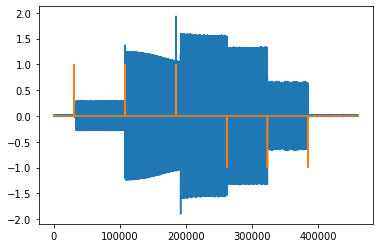

In [8]:
plt.rcParams['font.size'] = '10'
plt.figure()
plt.plot(rawSamples[0])
plt.plot(rawEvents[0])
plt.title("Forma de onda para uma aquisição tripla do LIT-SYN")
plt.xlabel("Amostras")
plt.ylabel("Corrente [A]")
plt.show()
# plt.savefig("Visual Example.pdf", bbox_inches='tight')

In [1]:
import sys
sys.path.append("../src/")

from CheckFullSignal import CheckFullSignal
from ModelHandler import ModelHandler
import h5py
import matplotlib.pyplot as plt
import pickle

configs = {
    "N_GRIDS": 5, 
    "SIGNAL_BASE_LENGTH": 12800, 
    "N_CLASS": 26, 
    "MARGIN_RATIO": 0.15, 
    "USE_NO_LOAD": False, 
    "MIN_EVENTS": 2
}

check = CheckFullSignal(configs=configs)
arq = h5py.File("../Synthetic_Full_iHall.hdf5", "r")

load_qtd = "8"

rawSamples = arq[load_qtd]["i"]
rawEvents = arq[load_qtd]["events"]    
rawLabels = arq[load_qtd]["labels"]

model = ModelHandler.loadModel("../TrainedWeights/Final/1/best_model.h5")
scaler = pickle.load(open("../TrainedWeights/Final/scaler.p", "rb"))

/home/lucasnolasco/.local/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MaxAbsScaler from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


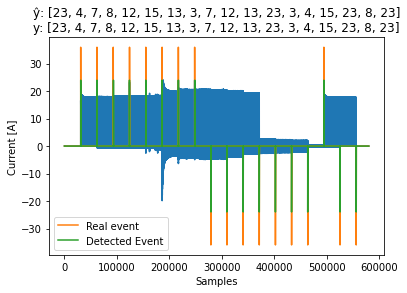

In [9]:
plt.rcParams['font.size'] = '10'
# for i in range(5*16 + 5, rawSamples.shape[0], 16):
for i in range(0, rawSamples.shape[0], 16):
    plt.figure()
    check.checkSignal(x=rawSamples[i], ydet=rawEvents[i], yclass=rawLabels[i], model=model, scaler=scaler)
    # plt.show()
    plt.savefig("Visual Example.pdf", bbox_inches='tight')